# SCC0287 - Mineração de Dados Não Estruturados

# Trabalho 1 - Mineração de texto

# Classificando mensagens como spam ou não spam

*Baseado nos códigos e conteúdos apresentados em aula.*

## Grupo:

**Alvaro Valentim P M Bandeira, Nº USP 10392150**

Bacharelado em Estatística e Ciência de Dados

email: avalentim98@usp.br

github: https://github.com/ValentAlv

**Douglas Decicino de Andrade, Nº USP 10883512**

Bacharelado em Estatística e Ciência de Dados

email: douglasdecicino@usp.br

github: https://github.com/decicino


**Renan de Oliveira da Cruz, Nº USP 10801090**

Bacharelado em Estatística e Ciência de Dados

email: r_oliveira@usp.br

github: https://github.com/nan-oliveira


Link do vídeo: https://drive.google.com/file/d/1rEkp3O05r-TN4e5hAz_TEdn__PU0zlaA/view?usp=sharing


## Importando Bibliotecas

Abaixo temos alguns imports que serão utilizados no decorrer do notebook.

In [ ]:
import pandas as pd

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk import download

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import gensim 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Conjunto de dados

Os dados podem ser obtidos no site: https://www.kaggle.com/team-ai/spam-text-message-classification

Nosso conjunto de dados consiste em mais de 5000 mensagens classificadas como "spam" ou "ham"(não-spam). 

Nosso objetivo nesse estudo é aplicar os conhecimentos aprendidos até momento na disciplina para classificar se determinada mensagem é spam ou não, baseados em 2 técnicas de pré-processamento diferentes (Bag-of-words e Word2vec).

Abaixo temos a leitura dos dados.

In [ ]:
data = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Vejamos abaixo a quantidade de mensagens que são classificadas como spam e a quantidade de dados que são classificadas como não spam.

In [ ]:
print('Mensagem classificadas como não-spam:', len(data.query("Category == 'ham'")))
print('Mensagem classificadas como spam:', len(data.query("Category == 'spam'")))

Mensagem classificadas como não-spam: 4825
Mensagem classificadas como spam: 747


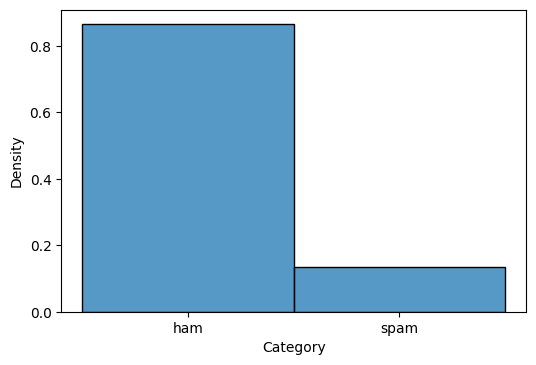

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
sns.histplot(data['Category'], stat="density")
plt.show()

A partir da quantidade de mensagens classificadas em cada categoria, assim como pelo gráfico de distribuição da variável resposta podemos perceber um alto desbalanceamento da resposta. Isto é, existem muitas mais mensagens classificadas como não spam do que como spam. 

## Bag-of-words

Abaixo temos a definição de algumas funções que serão utilizadas. 

In [ ]:
# remoção de pontuacao e stopwords
def remove_stopwords(text,lang,domain_stopwords=[]):
  
  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'
  
  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    s += token+" "
  return s.strip()

# stemming
def stemming(text,lang):
  
  stemmer = PorterStemmer() # stemming para ingles
  
  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese
    
  tokens = word_tokenize(text) #obtem tokens
  
  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "
    
  return sentence_stem.strip()

def compute_bag_of_words(dataset,lang,domain_stopwords=[]):
  
  d = []
  for index,row in data.iterrows():
    text = row['Message'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)
  
  matrix = CountVectorizer(max_features=10000)
  X = matrix.fit_transform(d)
  
  count_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names())

  return count_vect_df

Abaixo aplicamos a função que, para cada documento, remove pontuacao e stopwords e realiza a stemização. Além de aplicar a bag of words.

In [ ]:
bow = compute_bag_of_words(data, 'english')
bow

,0089mi,0776xxxxxxx,077xxx,0789xxxxxxx,0796xxxxxx,07xxxxxxxxx,08452810075over18,08700621170150p,08701417012150p,08702840625comuk,08704439680tsc,0870737910216yr,0870k,087123002209am7pm,08712460324nat,0871277810710pmin,0871277810910pmin,087143423992stop,087147123779am7pm,08717890890,08718726270150gbpmtmsg18,09065171142stopsms08,09065171142stopsms08718727870150ppm,09066649731from,0anetwork,10,100,1000,10000,100000,1000call,100psm,101mega,10am,10am7pm,10am9pm,10k,10p,10pmin,10ppm,...,youphon,your,yourinclus,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Abaixo realizamos uma ponderação na matriz de dados.

In [ ]:
#transformando os dados
X = np.array(bow)
length = np.sqrt((X**2).sum(axis=1))[:,None]
X = X / (length+0.00001)

X.shape

(5572, 7566)

Uma vez de posse da matriz de atributos, vamos à classificação com o objetivo de predizer se uma mensagem é spam ou não.

In [ ]:
Y = data['Category'].to_list()

In [ ]:
#dividindo o conjunto em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=14)

### Classificador: KNN

Realizamos agora a classifição mediante o classificador KNN.

In [ ]:
#definindo nosso modelo:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#calculando os valores preditos:
y_pred = neigh.predict(X_test)

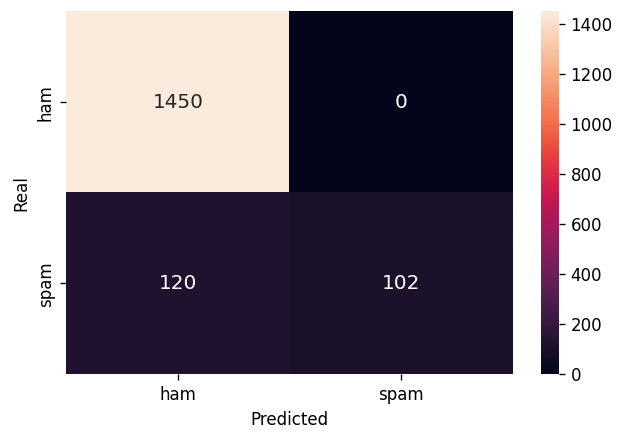

In [ ]:
#plotando a matriz de confusão:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test, y_pred)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

plt.figure(figsize=(6,4), dpi=120)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1450
        spam       1.00      0.46      0.63       222

    accuracy                           0.93      1672
   macro avg       0.96      0.73      0.79      1672
weighted avg       0.93      0.93      0.92      1672



Como podemos ver a acurácia resultou em 93%. Todavia, como o esperado, o modelo de classificação teve uma dificuldade de classificar a classe spam, visto que essa classe está em menor quantidade nos dados.

### Classificador: SVM

Realizamos agora a classifição mediante o classificador SVM.

In [ ]:
svm_clf = SVC().fit(X_train, y_train)

In [ ]:
y_pred = svm_clf.predict(X_test)

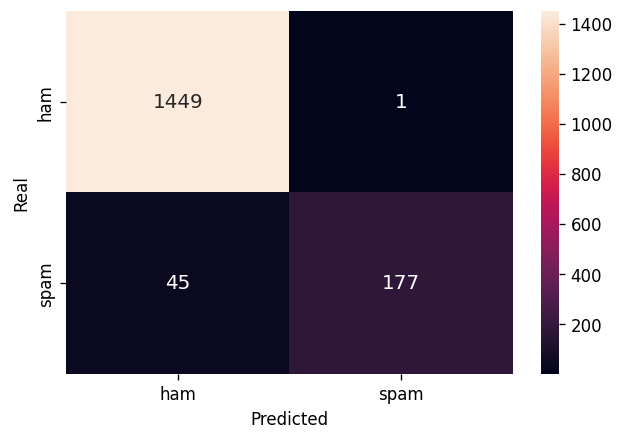

In [ ]:
#plotando a matriz de confusão:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test, y_pred)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

plt.figure(figsize=(6,4), dpi=120)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [ ]:
#exibindo o relatório de classificação:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1450
        spam       0.99      0.80      0.89       222

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



De forma geral, o modelo SVM perfomou melhor do que o modelo KNN considerando o Bag-of-words. A acurácia foi levemente maior e as outras medidas (com excessão da *precision*) associadas a classe spam foram maiores também.

## Word2vec

Vamos agora a utilização do Word2vec.

In [ ]:
# percorre cada linha do dataset, preprocessa e armazena na lista documents
documents = []
for index,row in data.iterrows(): # para cada linha do dataset
  if len(row['Message']) >= 30: # se a linha possui mais do que 30 caracteres
    tokens = gensim.utils.simple_preprocess (row['Message']) # preprocessamento simples de cada texto
    documents.append(tokens)

In [ ]:
documents[1]

['free',
 'entry',
 'in',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'to',
 'to',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'apply',
 'over']

Temos abaixo a definição do modelo Word2Vec.

In [ ]:
word2vec = gensim.models.Word2Vec(
            documents, # lista com documents
            size=300, # tamanho da dimensao de cada palavra
            window=2, # tamanho da janela de contexto
            min_count=1, # numero minimo de ocorrencia de uma palavra no texto
            workers=4, # paralelizacao/cpu
            iter=10) # numero maximo de iteracoes

Abaixo separamos os dados em treinamento e teste.

In [ ]:
df_train, df_test = train_test_split(data, test_size=0.30, random_state=14)

Abaixo aplicamos o Word2Vec para os dados de treinamento.

In [ ]:
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

# para o conjunto de treino
doc_embeddings = []
for index,row in df_train.iterrows():
  sentence = preprocess(row['Message'])
  L = []
  for token in sentence:
    try:
      L.append(word2vec.wv[token])
    except:
      1
  if len(L) > 0: tweet_vec = np.mean(np.array(L),axis=0)
  else: tweet_vec = np.zeros(300)
  doc_embeddings.append(tweet_vec)

In [ ]:
X_train = np.array(doc_embeddings)
y_train = df_train.Category.to_list()
X_train.shape

(3900, 300)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.159534,0.178911,0.162047,-0.087342,0.006618,0.017176,-0.107023,-0.131029,-0.372253,0.085908,0.060770,-0.269870,0.146632,0.184662,-0.095854,0.188019,0.011890,0.012713,0.011671,-0.226253,0.176638,-0.122323,0.095976,-0.036525,0.077982,0.155841,0.267884,-0.002008,-0.142928,0.051668,0.108385,0.075850,-0.012479,-0.062988,-0.018570,0.110483,0.219943,-0.161366,0.001189,-0.131142,...,-0.032320,-0.111430,0.188374,-0.006386,-0.062544,0.083887,0.078090,0.377434,0.076824,0.048203,-0.143548,0.016660,-0.010462,-0.224040,-0.077767,-0.003871,-0.231172,0.116560,-0.328430,0.035632,0.254876,0.229870,-0.055734,0.036763,0.073520,-0.093338,-0.023115,-0.075543,0.028880,0.013669,-0.114010,-0.118575,0.036921,-0.209113,0.121261,0.178076,-0.021866,-0.092071,0.232749,0.256157
1,0.122115,0.146716,0.109887,-0.082584,-0.007274,0.008727,-0.082814,-0.101227,-0.285494,0.058063,0.052927,-0.200721,0.104579,0.159897,-0.098311,0.133247,0.041351,-0.004899,-0.006100,-0.171377,0.128527,-0.100411,0.070934,-0.015943,0.057192,0.102385,0.209137,0.021593,-0.126471,0.056318,0.068824,0.055030,0.007899,-0.036054,-0.010104,0.077058,0.164437,-0.127713,0.023954,-0.126462,...,-0.010115,-0.088693,0.149928,-0.005800,-0.049311,0.061061,0.047911,0.303624,0.051163,0.016219,-0.088877,-0.011980,-0.017876,-0.173532,-0.032968,0.009431,-0.143232,0.077032,-0.242622,0.015552,0.220205,0.191134,-0.022536,0.050957,0.023614,-0.084802,-0.015887,-0.044360,0.023173,0.014331,-0.086850,-0.094490,0.035799,-0.121457,0.106704,0.142756,-0.041637,-0.064274,0.171763,0.189473
2,0.115533,0.147307,0.104479,-0.088976,-0.012793,0.009190,-0.089627,-0.097475,-0.289304,0.049503,0.040654,-0.196102,0.116507,0.158588,-0.098846,0.151918,0.042705,-0.000979,-0.013853,-0.159473,0.133512,-0.104616,0.077067,-0.019933,0.054794,0.107704,0.208613,0.016783,-0.120325,0.052770,0.066790,0.068742,0.010000,-0.038126,-0.006959,0.089868,0.157821,-0.112028,0.007764,-0.120466,...,-0.017372,-0.090721,0.146840,-0.003944,-0.055389,0.059203,0.047955,0.304342,0.052211,0.041547,-0.092783,0.007097,-0.018169,-0.187901,-0.026275,-0.001771,-0.171457,0.085597,-0.243620,0.034594,0.218032,0.188115,-0.037204,0.035221,0.024966,-0.088315,-0.020382,-0.047743,0.009015,0.009494,-0.099518,-0.103900,0.046508,-0.139198,0.105618,0.133991,-0.038277,-0.063044,0.190977,0.208783
3,0.133004,0.164243,0.117664,-0.100160,-0.014854,0.011121,-0.102327,-0.110415,-0.325650,0.057505,0.049790,-0.219571,0.131622,0.178795,-0.111632,0.168573,0.051536,-0.003480,-0.014946,-0.178502,0.149680,-0.119092,0.083015,-0.020426,0.062630,0.120955,0.233625,0.020850,-0.136698,0.057997,0.076028,0.075693,0.014666,-0.042940,-0.008110,0.100240,0.179567,-0.127858,0.010668,-0.135982,...,-0.017909,-0.103151,0.165335,-0.004557,-0.058980,0.069197,0.052318,0.341896,0.061012,0.046589,-0.104800,0.007419,-0.019868,-0.209961,-0.030441,0.002338,-0.190671,0.097819,-0.272559,0.038095,0.245638,0.211556,-0.041542,0.042294,0.027740,-0.098757,-0.022703,-0.053045,0.012030,0.011336,-0.113486,-0.115245,0.050904,-0.156158,0.119219,0.148002,-0.045257,-0.071937,0.216881,0.235184
4,0.146560,0.167815,0.137103,-0.089349,0.010644,0.020191,-0.099573,-0.118038,-0.337282,0.078867,0.044942,-0.245406,0.142020,0.149593,-0.073676,0.186057,0.023998,0.010666,0.009539,-0.192884,0.154888,-0.111944,0.088460,-0.031011,0.066715,0.139164,0.249965,0.006689,-0.131511,0.039895,0.114380,0.082483,-0.007155,-0.064577,-0.017903,0.113132,0.200072,-0.141446,-0.016810,-0.109742,...,-0.028365,-0.099601,0.175930,-0.004154,-0.051312,0.078191,0.080808,0.339906,0.074915,0.054027,-0.131629,0.034058,-0.014143,-0.216801,-0.068992,-0.006098,-0.229698,0.112243,-0.297423,0.046698,0.224726,0.204972,-0.056701,0.028392,0.075226,-0.091282,-0.028733,-0.074031,0.030867,0.011900,-0.11103

Em seguida, realizamos a aplicação do Word2Vec para os dados de teste.

In [ ]:
#para o conjunto de teste:
doc_embeddings = []
for index,row in df_test.iterrows():
  sentence = preprocess(row['Message'])
  L = []
  for token in sentence:
    try:
      #print(token,word2vec[token])
      L.append(word2vec[token])
    except:
      1
  if len(L) > 0: tweet_vec = np.mean(np.array(L),axis=0)
  else: tweet_vec = np.zeros(300)
  doc_embeddings.append(tweet_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
X_test = np.array(doc_embeddings)
y_test = df_test.Category.to_list()
X_test.shape

(1672, 300)

### Classificador: KNN

Ainda, vamos realizar a classificação dos dados por meio do modelo KNN.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(X_test)

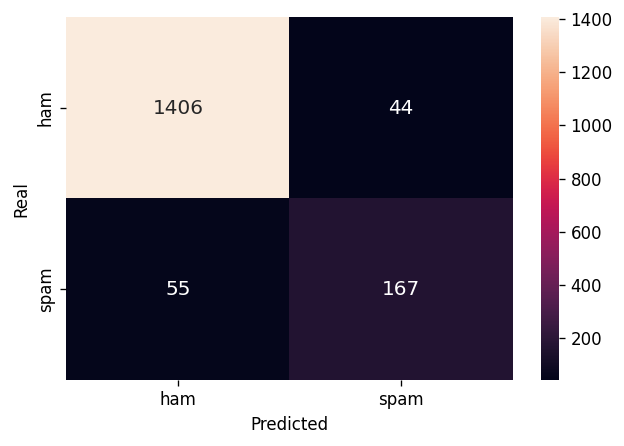

In [ ]:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test, y_pred)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

plt.figure(figsize=(6,4), dpi=120)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [ ]:
#exibindo o relatório de classificação:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.97      1450
        spam       0.79      0.75      0.77       222

    accuracy                           0.94      1672
   macro avg       0.88      0.86      0.87      1672
weighted avg       0.94      0.94      0.94      1672



Como podemos ver acima a acurácia resultou em 94%, uma métrica consideravelmente satisfatória tendo em consideração o desbalanceamento do conjunto de dados (13,41% de spam e 86,59% de não spam).

### Classificador: SVM

Vamos realizar a classificação dos dados por meio do modelo SVM.

In [ ]:
svm_clf = SVC().fit(X_train, y_train)

In [ ]:
y_pred = svm_clf.predict(X_test)

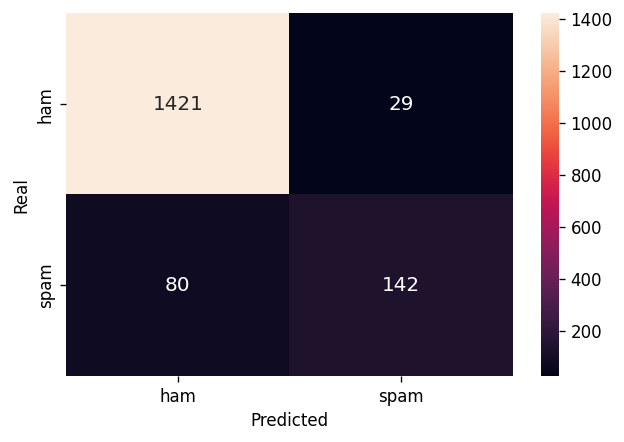

In [ ]:
#plotando a matriz de confusão:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test, y_pred)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

plt.figure(figsize=(6,4), dpi=120)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [ ]:
#exibindo o relatório de classificação:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96      1450
        spam       0.83      0.64      0.72       222

    accuracy                           0.93      1672
   macro avg       0.89      0.81      0.84      1672
weighted avg       0.93      0.93      0.93      1672



Segundo a métrica acurácia o modelo SVM foi bem semelhante ao modelo KNN considerando o Word2vec. De forma geral ambos os modelos performaram de forma bem semelhante.

## Conclusão

In [ ]:
from tabulate import tabulate

table = [['Pré-processamento', 'Acurácia KNN', 'Acurácia SVM'],
         ['Bag-of-words', '92.8%', '97.2%'],
         ['Word2vec', '94.0%', '93.4%']]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══════════════════╤══════════════╤══════════════╕
│ Pré-processamento │ Acurácia KNN │ Acurácia SVM │
├───────────────────┼──────────────┼──────────────┤
│ Bag-of-words      │ 92.8%        │ 97.2%        │
├───────────────────┼──────────────┼──────────────┤
│ Word2vec          │ 94.0%        │ 93.4%        │
╘═══════════════════╧══════════════╧══════════════╛


Notamos que ambos os modelos (Bag-of-words e Word2vec) obtiveram uma boa performance, com o modelo utilizando Word2vec tendo uma acurácia um pouco melhor segundo o KNN e o contrário acontece considerando o SVM.


Como nossos dados são muito desbalanceados, a acurácia acaba não sendo a melhor métrica de avaliação. Veremos duas melhores abaixo:

In [ ]:
table = [['Pré-processamento', 'Precisão (Spam) KNN', 'Recall (Spam) KNN', 'Precisão (Spam) SVM', 'Recall (Spam) SVM'],
         ['Bag-of-words','100%','46%', '99%', '80%'],
         ['Word2vec','79%','75%', '83%', '64%']]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════════╤═══════════════════╤═════════════════════╤═══════════════════╕
│ Pré-processamento │ Precisão (Spam) KNN │ Recall (Spam) KNN │ Precisão (Spam) SVM │ Recall (Spam) SVM │
├───────────────────┼─────────────────────┼───────────────────┼─────────────────────┼───────────────────┤
│ Bag-of-words      │ 100%                │ 46%               │ 99%                 │ 80%               │
├───────────────────┼─────────────────────┼───────────────────┼─────────────────────┼───────────────────┤
│ Word2vec          │ 79%                 │ 75%               │ 83%                 │ 64%               │
╘═══════════════════╧═════════════════════╧═══════════════════╧═════════════════════╧═══════════════════╛


Baseado no Recall (de todos as observações que realmente são Spam, quantas foram preditas corretamente), o modelo pré-processado com Word2vec sai na frente com grande vantagem segundo o KNN, sendo sem dúvidas um melhor preditor. Porém, considerando que o nosso problema vai ser aplicado em áreas como detecção de Spams em e-mails e SMS's, a métrica que se torna mais importante é a Precisão (de todas as observações preditas como Spam, quantas realmente são Spam), pois, nesses casos, o erro do tipo II (prever como Spam uma mensagem que não é) se torna inaceitável.

Baseados na Precisão, vemos que 21% das mensagens com Word2vec que foram classificadas como Spam segundo o KNN e 17% segundo o SVM, podem, na verdade, ser mensagens reais e importantes, resultado esse que nenhum usuário ficaria satisfeito. Por outro lado, no modelo pré-processado com Bag-of-words vemos uma precisão de 100% considerando o KNN e 99% considerando o SVM, o que indica uma baixíssima frequência de ocorrência do erro do tipo II nesse caso.

Baseados nas observações acima, podemos concluir que o modelo pré-processado com Bag-of-words é o mais adequado ao uso, mesmo não sendo o com melhor desempenho, e se caso tivessemos que escolher um para implementar num serviço de e-mails ou SMS's, ele seria o escolhido.